In [2]:
import pandas as pd
from sqlalchemy import create_engine, inspect

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create a connection to the database
database_path = "Resources/hawaii.sqlite"
connection_str = f"sqlite:///{database_path}"
print(connection_str)

engine = create_engine(connection_str)

sqlite:///Resources/hawaii.sqlite


In [4]:
# create the inspector and connect to the engine
inspector_gadget = inspect(engine)

tables = inspector_gadget.get_table_names()
for table in tables:
    print(table)
    
    # get all columns in table
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column)
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [5]:
query = "SELECT * from measurement LIMIT 20;"
df = pd.read_sql(query, engine)
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [7]:
query = "SELECT * from station LIMIT 20;"
df = pd.read_sql(query, engine)
df.head(10)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [10]:
query = """SELECT
                MAX(date)
            FROM
                measurement
        """

engine.execute(query).fetchall()

[('2017-08-23',)]

In [27]:
query = """SELECT
                date,
                prcp
            FROM
                measurement
            WHERE
                date >= '2016-08-23'
                and prcp is not null
            order by
                date asc;
        """
df = pd.read_sql(query, engine)
df.head(10)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79
5,2016-08-23,0.70
6,2016-08-24,0.08
7,2016-08-24,2.15
8,2016-08-24,2.28
9,2016-08-24,1.22


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2021 non-null   object 
 1   prcp    2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.7+ KB


In [29]:
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2021 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.7 KB


C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: Fut

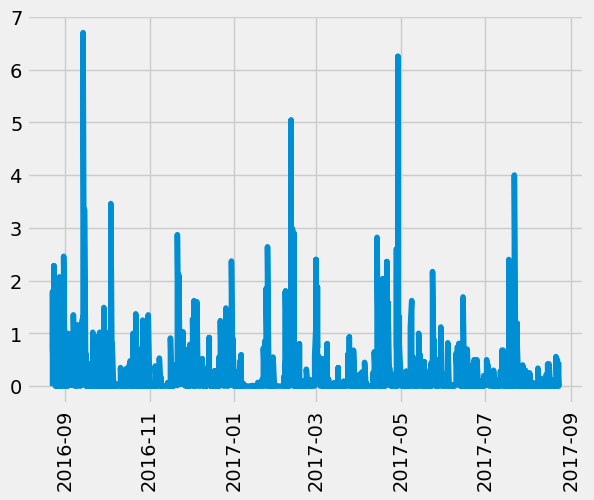

In [30]:
from matplotlib import style
style.use('fivethirtyeight')

# plt.figure(figsize=(12,10))
plt.plot(df["date"], df.prcp)
plt.xticks(rotation=90)
plt.show()

In [31]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
### BOOTH

query = """SELECT
                date,
                avg(prcp) as prcp
            FROM
                measurement
            WHERE
                date >= '2016-08-23'
                and prcp is not null
            GROUP BY
                date
            order by
                date asc;
        """
df = pd.read_sql(query, engine)
df["date"] = pd.to_datetime(df["date"])
df.head(10)

,date,prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000
5,2016-08-28,0.516667
6,2016-08-29,0.243333
7,2016-08-30,0.011667
8,2016-08-31,0.636000
9,2016-09-01,0.006000


C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\abooth\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: Fut

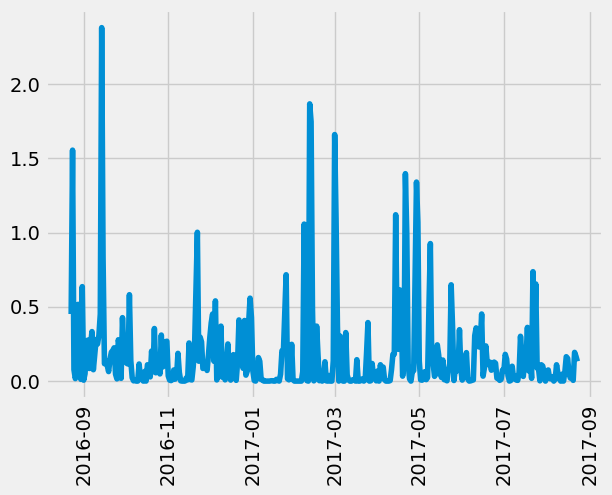

In [26]:
plt.plot(df["date"], df.prcp)
plt.xticks(rotation=90)
plt.show()

In [32]:
### STATIONs

In [34]:
query = "SELECT COUNT(*) FROM station"
engine.execute(query).fetchall()

[(9,)]

In [36]:
query = """SELECT
                s.station,
                count(m.id) as num_obs
            FROM
                measurement m
                JOIN station s on m.station = s.station
            GROUP BY
                s.station
            ORDER BY
                num_obs desc;
        """

df = pd.read_sql(query, engine)
df

,station,num_obs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [38]:
query = """SELECT
                min(tobs) as min_tobs,
                max(tobs) as max_tobs,
                avg(tobs) as avg_tobs
            FROM
                measurement
            WHERE
                station = 'USC00519281'
        """
df = pd.read_sql(query, engine)
df

,min_tobs,max_tobs,avg_tobs
0,54.0,85.0,71.663781


In [41]:
query = """SELECT
                date,
                tobs
            FROM
                measurement
            WHERE
                date >= '2016-08-23'
                and tobs is not null
                and station = 'USC00519281'
            order by
                date asc;
        """
df = pd.read_sql(query, engine)
df["date"] = pd.to_datetime(df["date"])
df.head(10)

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
5,2016-08-28,73.0
6,2016-08-29,78.0
7,2016-08-30,77.0
8,2016-08-31,78.0
9,2016-09-01,80.0


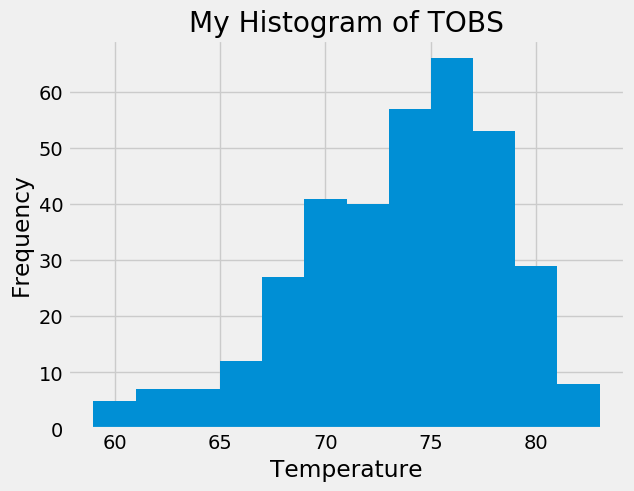

In [44]:
plt.hist(df.tobs, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("My Histogram of TOBS")
plt.show()

In [45]:
engine.dispose()